# Python Linear Algebra Part 2: Matrix Factorization LU_QR_Cholesky_Eigen_SVD
## Full Day Workshop for user learn Data Science with Python
## 2018 Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose

# Matrix Decompositions
- Many complex matrix operations cannot be solved effciently or with stability using the limited
precision of computers. 
- Matrix decompositions are methods that reduce a matrix into constituent
parts that make it easier to calculate more complex matrix operations. 
- Matrix decomposition
methods, also called matrix factorization methods, are a foundation of linear algebra in computers,
- even for basic operations such as solving systems of linear equations, 
-calculating the inverse, and
calculating the determinant of a matrix

## LU Decomposition
- The LU decomposition is for square matrices and decomposes a matrix into L and U components.
- Where A is the square matrix that we wish to decompose, 
- L is the lower triangle matrix and U is the upper triangle matrix
- The factors L and U are triangular matrices. The factorization that comes from
elimination is A = LU
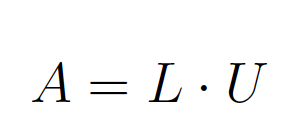

## LUP Decomposition
- The LU decomposition is found using an iterative numerical process and can fail for those
matrices that cannot be decomposed or decomposed easily. 
- A variation of this decomposition
that is numerically more stable to solve in practice is called the LUP decomposition, or the LU
decomposition with partial pivoting
- The rows of the parent matrix are re-ordered to simplify the decomposition process and the
additional P matrix specifies a way to permute the result 
- or return the result to the original
order. There are also other variations of the LU.
- The LU decomposition can be implemented in Python with the lu() function. 
- More
specically, this function calculates an LPU decomposition
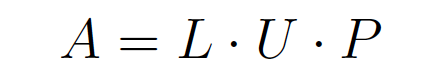

In [3]:
# LU decomposition
from numpy import array
from scipy.linalg import lu
# define a square matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(A)
# factorize
P, L, U = lu(A)


print(P)
print(L)
print(U)


# reconstruct
B = P.dot(L).dot(U)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## QR Decomposition
- The QR decomposition is for n * m matrices (not limited to square matrices) and decomposes
a matrix into Q and R components
- Where A is the matrix that we wish to decompose, Q a matrix with the size mm, and R is
an upper triangle matrix with the size m * n
- The QR decomposition can be implemented in NumPy using the qr() function. 
- By default,
the function returns the Q and R matrices with smaller or reduced dimensions that is more economical. 
- We can change this to return the expected sizes of m  m for Q and m  n for
R by specifying the mode argument as `complete'

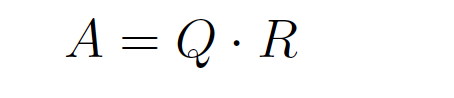

In [ ]:
# QR decomposition
from numpy import array
from numpy.linalg import qr
# define rectangular matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
Q, R = qr(A, 'complete')
print(Q)
print(R)
# reconstruct
B = Q.dot(R)
print(B) 


### Cholesky Decomposition
- The Cholesky decomposition is for square symmetric matrices where all values are greater than
zero, so-called positive definite matrices. 
- For our interests in machine learning, we will focus on
the Cholesky decomposition for real-valued matrices and ignore the cases when working with
complex numbers. 
- Where A is the matrix being decomposed, L is the lower triangular matrix. LT is the
transpose of L. 
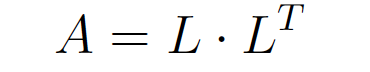

- When
decomposing symmetric matrices, the Cholesky decomposition is nearly twice as efficient as the
LU decomposition 
- The Cholesky decomposition can be implemented in NumPy by calling the cholesky()
function

In [4]:
# Cholesky decomposition
from numpy import array
from numpy.linalg import cholesky
# define symmetrical matrix
A = array([
[2, 1, 1],
[1, 2, 1],
[1, 1, 2]])
print(A)
# factorize
L = cholesky(A)
print(L)
# reconstruct
B = L.dot(L.T)
print(B)

[[2 1 1]
 [1 2 1]
 [1 1 2]]
[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


# Eigendecomposition of a Matrix
- Eigendecomposition of a matrix is a type of decomposition that involves decomposing a square
matrix into a set of eigenvectors and eigenvalues
- Eigen is not a name, e.g. the method is not named after \Eigen"; eigen (pronounced
eye-gan) is a German word that means own or innate, as in belonging to the parent matrix
- it breaks it
down into constituent parts to make certain operations on the matrix easier to perform. 
- Like
other matrix decomposition methods, Eigendecomposition is used as an element to simplify the
calculation of other more complex matrix operations
- Eigendecomposition can also be used to calculate the principal components of a matrix in the
PCA that can be used to reduce the dimensionality


## Eigenvectors and Eigenvalues
- Eigenvectors are unit vectors, which means that their length or magnitude is equal to 1.0.
- Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude. 
- For example,
a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it. 
- A matrix
that has only positive eigenvalues is referred to as a positive definite matrix, 
- whereas if the
eigenvalues are all negative, it is referred to as a negative definite matrix

In [5]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


### Confirm an Eigenvector and Eigenvalue
- We can confirm that a vector is indeed an eigenvector of a matrix. 
- We do this by multiplying
the candidate eigenvector by the value vector and comparing the result with the eigenvalue.

In [ ]:
# confirm eigenvector
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
# factorize
values, vectors = eig(A)
# confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)
C = vectors[:, 0] * values[0]
print(C)  


## Singular Value Decomposition
- The most known and widely used matrix decomposition
method is the Singular-Value Decomposition, or SVD. 
- it is often used
in a wide array of applications including compressing, denoising, and data reduction
- For the case of simplicity we will focus on the SVD for real-valued matrices and ignore
the case for complex numbers
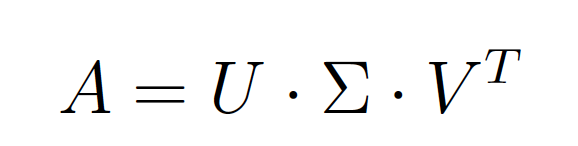

- Where A is the real n  m matrix that we wish to decompose, U is an m * m matrix, 
- represented by the uppercase Greek letter sigma) is an m * n diagonal matrix, and V T is the V
transpose of an n * n matrix where T is a superscript

## Calculate Singular-Value Decomposition
- The SVD can be calculated by calling the svd() function. 
- The function takes a matrix and
returns the U,$\sum$ and V elements. The $\sum$ diagonal matrix is returned as a vector of singular
values

In [6]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


### Reconstruct the Matrix
- The U, s, and V
elements returned from the svd() cannot be multiplied directly. 
- The s vector must be converted
into a diagonal matrix using the diag() function
- We can achieve this by creating a new $\sum$ matrix of all zero values that is m  n (e.g. more
rows) and populate the first n*n part of the matrix with the square diagonal matrix calculated
via diag()

In [9]:
# reconstruct rectangular matrix from svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
[1, 2],
[3, 4],
[5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print (U)
print (s)
print (V)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(V))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


## Pseudoinverse
- The pseudoinverse is the generalization of the matrix inverse for square matrices to rectangular
matrices where the number of rows and columns are not equal. 
- It is also called the Moore-Penrose
Inverse after two independent discoverers of the method or the Generalized Inverse
- Where A+ is the pseudoinverse, D+ is the pseudoinverse of the diagonal matrix $\sum$ and V T is
the transpose of V T . We can get U and V from the SVD operation 

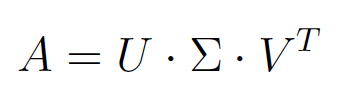

- The pseudoinverse provides one way of solving the linear regression equation, 
- specifically
when there are more rows than there are columns, 
- which is often the case. NumPy provides the
function pinv() for calculating the pseudoinverse of a rectangular matrix

In [10]:
# pseudoinverse
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
[0.1, 0.2],
[0.3, 0.4],
[0.5, 0.6],
[0.7, 0.8]])
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42385628e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


- We can calculate the pseudoinverse manually via the SVD and compare the results to the pinv() function
- First we must calculate the SVD. Next we must calculate the reciprocal of
each value in the s array. 
- Then the s array can be transformed into a diagonal matrix with an
added row of zeros to make it rectangular

In [11]:
# pseudoinverse via svd
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
[0.1, 0.2],
[0.3, 0.4],
[0.5, 0.6],
[0.7, 0.8]])
print(A)
# factorize
U, s, V = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = V.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42578328e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


## Dimensionality Reduction
- A popular application of SVD is for dimensionality reduction. 
- Data with a large number of
features, such as more features (columns) than observations (rows) may be reduced to a smaller
subset of features that are most relevant to the prediction problem.
- The result is a matrix with
a lower rank that is said to approximate the original matrix. 
- To do this we can perform an SVD
operation on the original data and select the top k largest singular values in $\sum$. 
- These columns
can be selected from  and the rows selected from V T .
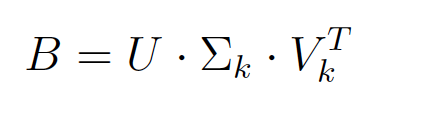

- In natural language processing, this approach can be used on matrices of word occurrences
or word frequencies in documents
- It is called Latent Semantic Analysis or Latent Semantic
Indexing


In [12]:
# data reduction with svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
[1,2,3,4,5,6,7,8,9,10],
[11,12,13,14,15,16,17,18,19,20],
[21,22,23,24,25,26,27,28,29,30]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(V))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(V.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


- The scikit-learn provides a TruncatedSVD class that implements this capability directly. 
- The
TruncatedSVD class can be created in which you must specify the number of desirable features
or components to select
e.g. 2.
- Once created, you can t the transform (e.g. calculate V T
k )
by calling the fit() function, then apply it to the original matrix by calling the transform()
function. 
- The result is the transform of A called T above. The example below demonstrates the
TruncatedSVD class.

In [13]:
# svd data reduction in scikit-learn
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define matrix
A = array([
[1,2,3,4,5,6,7,8,9,10],
[11,12,13,14,15,16,17,18,19,20],
[21,22,23,24,25,26,27,28,29,30]])
print(A)
# create transform
svd = TruncatedSVD(n_components=2)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


- Running the example first prints the defined matrix, followed by the transformed version
of the matrix. 
- We can see that the values match those calculated manually above, except for
the sign on some values. 
- We can expect there to be some instability when it comes to the
sign given the nature of the calculations involved and the differences in the underlying libraries
and methods used. 
- This instability of sign should not be a problem in practice as long as the
transform is trained for reuse.